   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
Descripción del dataset:
       SepalLengthC

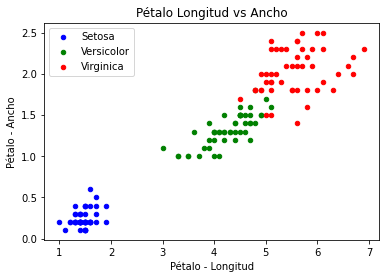

112 datos para entrenamiento y 38 datos para prueba 

*********************************************************************************************************
Precisión Regresión Logística training set: 0.96
Precisión Regresión Logística test set: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

*********************************************************************************************************
Precisión Máquinas de Vectores de Soporte training set: 0.96
Precisión Máquinas de Vectores de Soporte test set: 1.00
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-

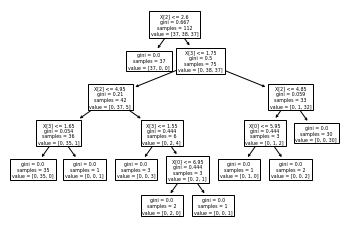

In [5]:
#AR. Utilización de modelos de aprendizaje supervisado (I)
#Un cliente se acercó a nuestra entidad para solicitar que le desarrollemos una aplicación que le permita clasificar de forma automática flores de la especie Iris. 
#a) Teniendo en cuenta lo anterior, entrene al menos 4 algoritmos de clasificación y escoja el modelo que mejor resultado arroje. 
#b) Haga capturas de pantalla de los resultados de los modelos. 
#c) Recoja los resultados del entrenamiento de cada uno de los algoritmos y compárelos.


import numpy as np
import pandas as pd 

#Read CSV
iris = pd.read_csv("Iris.csv")

print(iris.head())

#Drop Id
iris = iris.drop(columns='Id')
#print(iris.head())

#Info Dataset
print('Información del dataset:')
print(iris.info())

print('Descripción del dataset:')
print(iris.describe())

print('Distribución de las especies de Iris:')
print(iris.groupby('Species').size())

#Visualización Data

import matplotlib.pyplot as plt

#Pétalo - Longitud vs Ancho
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', 
          x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', 
    x='PetalLengthCm', y='PetalWidthCm', color='green', 
    label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', 
    x='PetalLengthCm', y='PetalWidthCm', color='red', label='Virginica', ax=fig)

fig.set_xlabel('Pétalo - Longitud')
fig.set_ylabel('Pétalo - Ancho')
fig.set_title('Pétalo Longitud vs Ancho')
plt.show()

#Algoritmos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report


#Separación datos en arrays
X = np.array(iris.drop(columns='Species'))
y = np.array(iris['Species'])

#Set train and test=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('{} datos para entrenamiento y {} datos para prueba \n'.format(X_train.shape[0], X_test.shape[0]))

#Modelo de Regresión Logística LogisticRegression
print('*********************************************************************************************************')
algoritmo = LogisticRegression(max_iter=1000) # max_iter=1000 añadido ya que sino me da error lbfgs failed to converge (status=1):STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Regresión Logística training set: {:.2f}'.format(algoritmo.score(X_train, y_train)))
print('Precisión Regresión Logística test set: {:.2f}'.format(algoritmo.score(X_test, y_test)))
print(classification_report(y_test, Y_pred))

#Modelo de Máquinas de Vectores de Soporte SVC
print('*********************************************************************************************************')
algoritmo = SVC()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Máquinas de Vectores de Soporte training set: {:.2f}'.format(algoritmo.score(X_train, y_train)))
print('Precisión Máquinas de Vectores de Soporte test set: {:.2f}'.format(algoritmo.score(X_test, y_test)))
print(classification_report(y_test, Y_pred))

#Modelo de Vecinos más Cercanos KNN
print('*********************************************************************************************************')
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión de KNN con K=7 training set: {:.2f}'.format(algoritmo.score(X_train, y_train)))
print('Precisión de KNN con K=7 test set: {:.2f}'.format(algoritmo.score(X_test, y_test)))
print(classification_report(y_test, Y_pred))

#Modelo de Árboles de Decisión Clasificación DecisionTreeClassifier
print('*********************************************************************************************************')
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)

print('Precisión Árboles de Decisión Clasificación training set: {:.2f}'.format(algoritmo.score(X_train, y_train)))
print('Precisión Árboles de Decisión Clasificación test set: {:.2f}'.format(algoritmo.score(X_test, y_test)))
print(classification_report(y_test, Y_pred))
#plot 
tree.plot_tree(algoritmo)


#Selección mejor modelo
print('El modelo que devuelve mejor precisión es Árboles de Decisión Clasificación, con un resultado de {:.2f} utilizando \n el conjunto de entrenamiento y un resultado de {:.2f} utilizando el conjunto de prueba.'.format(algoritmo.score(X_train, y_train),algoritmo.score(X_test, y_test)))